### Importa todas as libs necessárias para criar o modelo

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

warnings.filterwarnings('ignore')

#### O dataset contém informações sobre clientes de um banco. A variável alvo é o Churn (se o cliente saiu do banco ou não).

Descrição de cada coluna:

1. customer_id, variável não utilizada.
2. credit_score, usado como entrada.
3. país, usado como entrada.
4. gênero, usado como entrada.
5. idade, usada como entrada.
6. posse, usada como entrada.
7. saldo, usado como entrada.
8. número_produtos, usado como entrada.
9. credit_card, usado como entrada.
10. active_member, usado como entrada.
11. salário_estimado, usado como entrada.
12. churn, usado como alvo. 1 se o cliente tiver saído do banco durante algum período ou 0 se não.

In [50]:
# Caminho para o excel onde estão os dados brutos
url = r"C:\Users\Notbook\Desktop\PUC\Eng. Software\MVP\MVP - Qualidade de Software e Sistemas Inteligentes\machineLearning\data\Bank Customer Churn Prediction.csv"

# Lê o arquivo com os dados
df = pd.read_csv(url)

# Vê quantas linhas e colunas existem no DataFrame
print(df.shape)

# Mostra as primeiros 5 linhas do df
df.head()

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [52]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


### Excluo a coluna que não vou precisar para o modelo

In [53]:
df.drop(['customer_id'], axis = 1, inplace=True)

### Verifico se a coluna foi excluida

In [54]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Vejo se tem algum valor nulo

In [55]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Olhando individualmente nossas variáveis ​​categóricas conseguimos verificar que nossa base tem predominância de população francesa, temos uma pequena quantidade de homens maior que mulheres, olhando para a variável podemos perceber que temos uma boa distribuição tomando os valores ​​0 e 10, olhando para a variável product_number podemos ver que temos predominância nos produtos 1 e 2, também podemos verificar que a maioria das transações são feitas por cartão de crédito, quando olhamos para a nossa variável alvo podemos ver que têm muito mais valores negativos do que positivos.

<Axes: xlabel='churn', ylabel='count'>

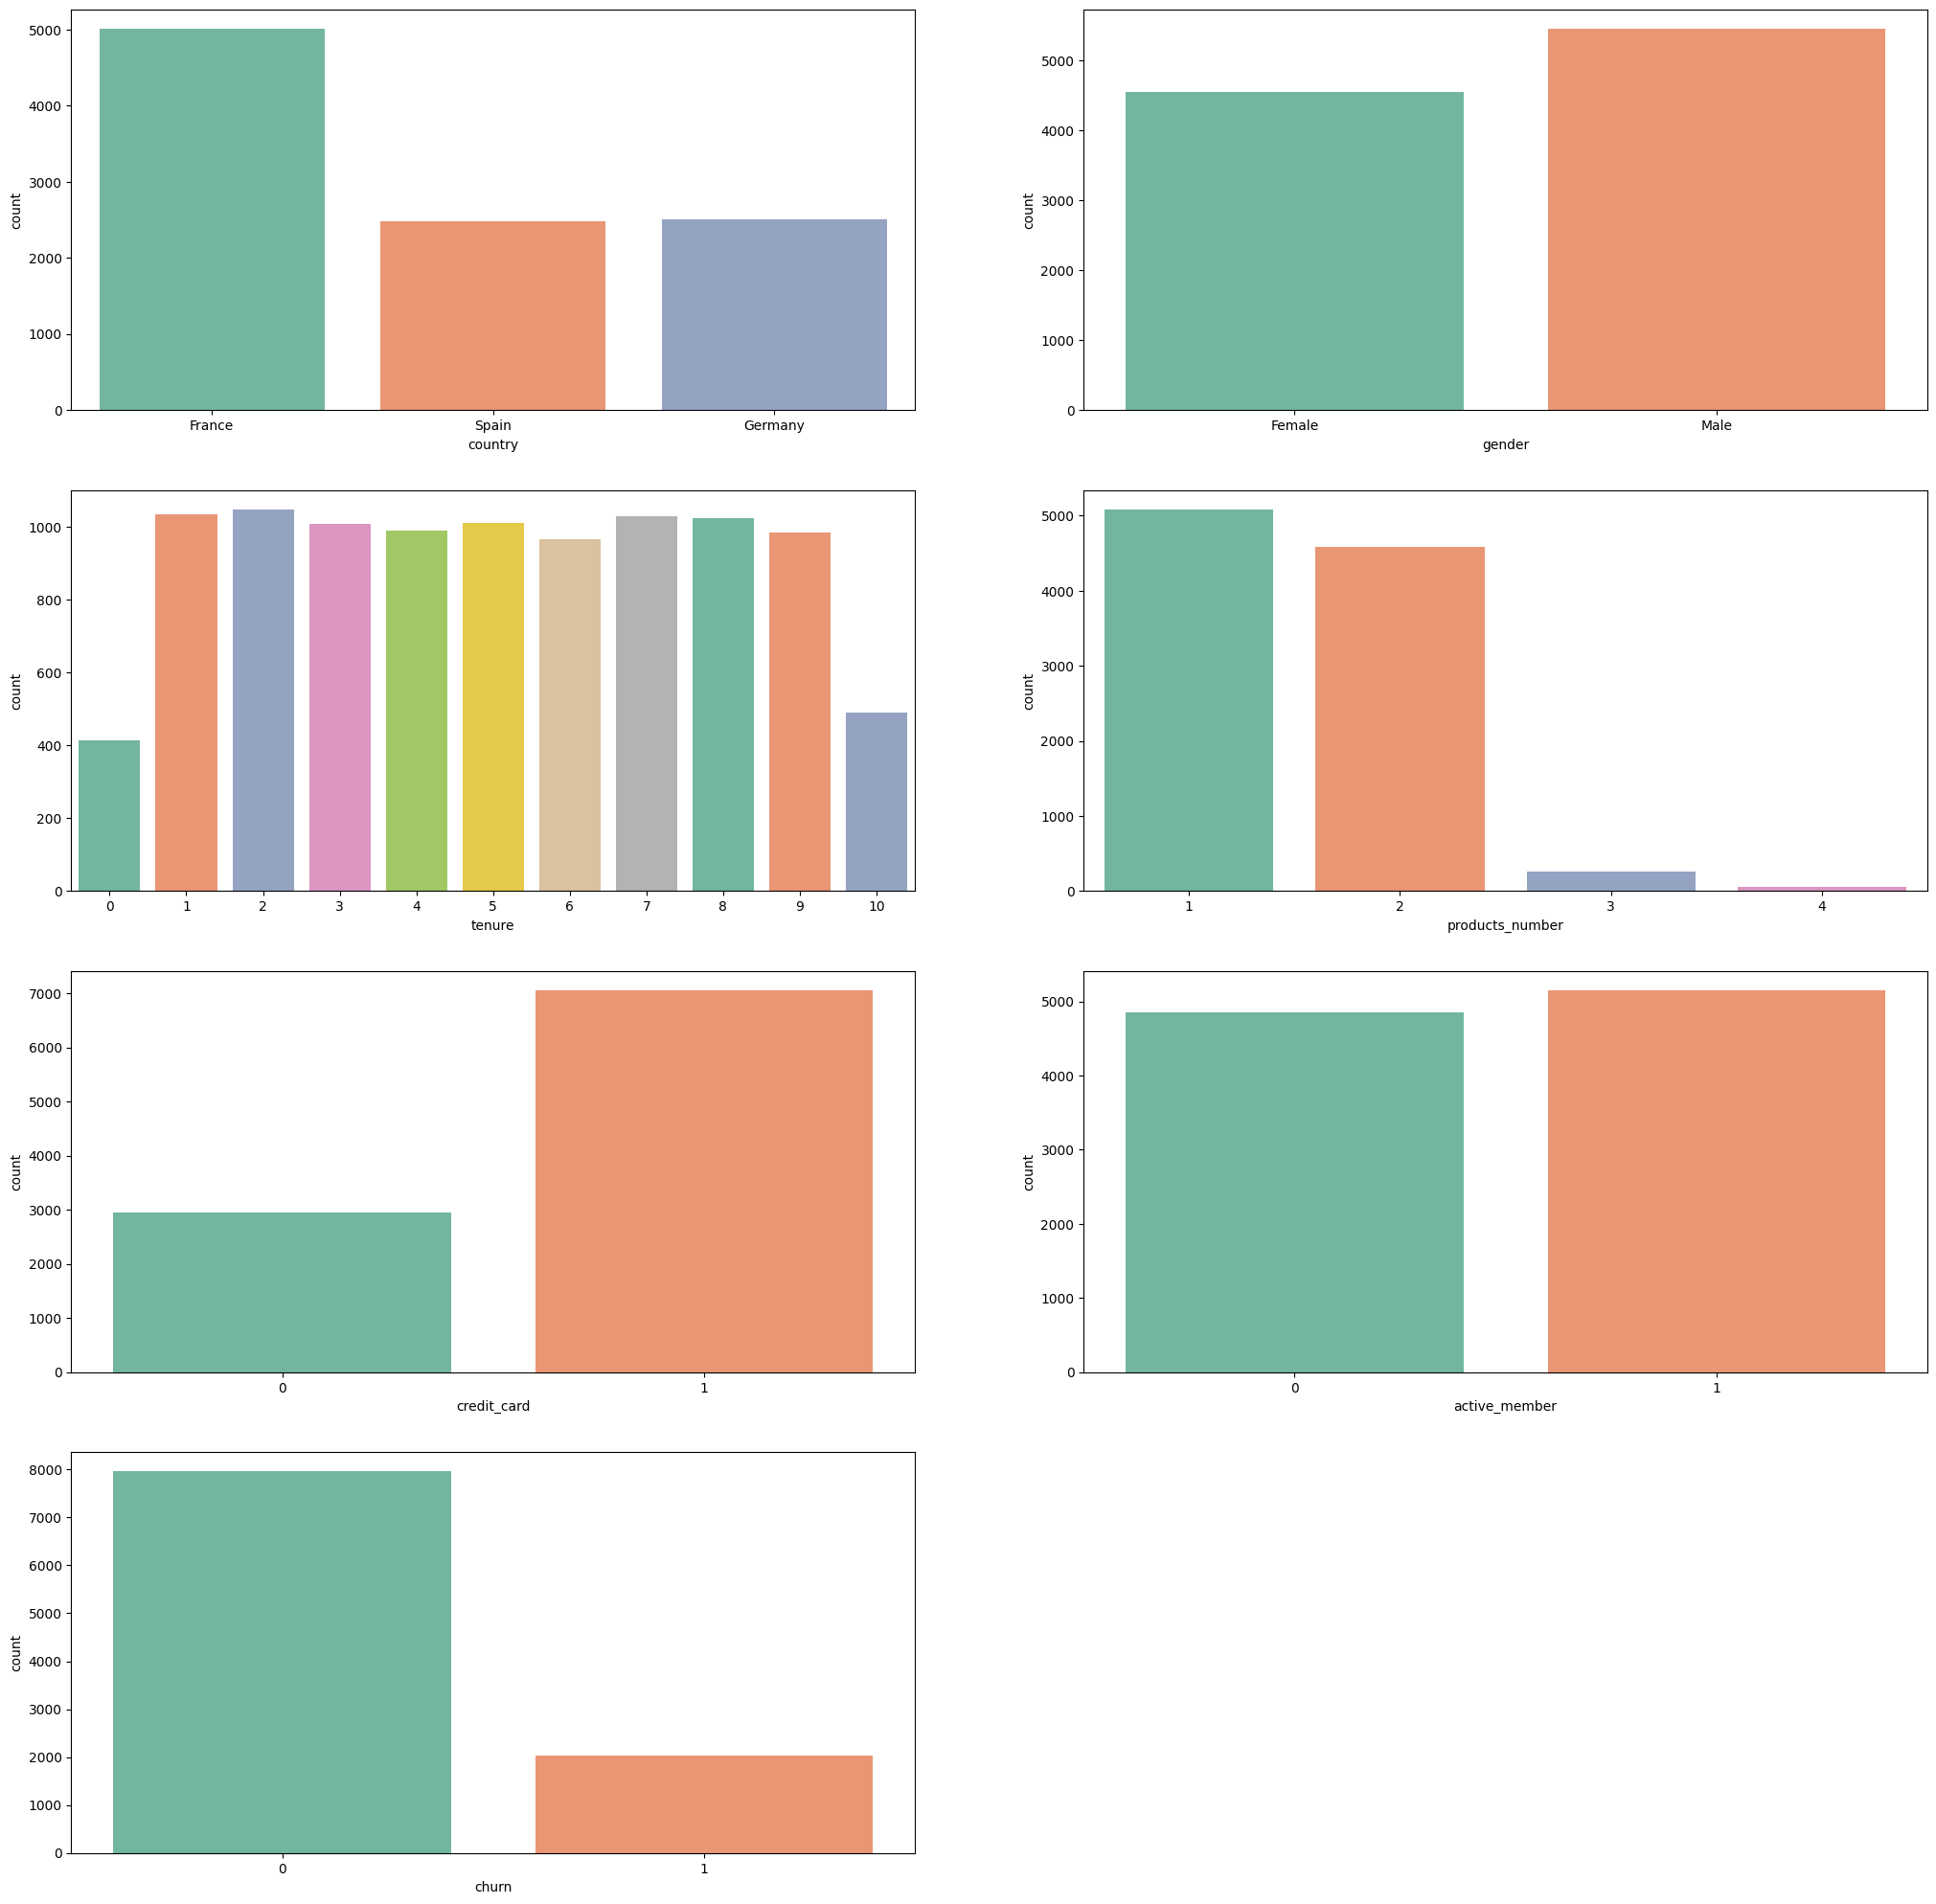

In [56]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette='Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Set2', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Set2', data = df)

##### Verificação dos valores e contagem dos dados em geral

In [57]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [58]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [59]:
df['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [60]:
df['products_number'].value_counts()

products_number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [61]:
df['credit_card'].value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

In [62]:
df['active_member'].value_counts()

active_member
1    5151
0    4849
Name: count, dtype: int64

In [63]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

Quando olhamos para a variável credit_score, não conseguimos ver muita diferença entre as pontuações e a chance de churn.

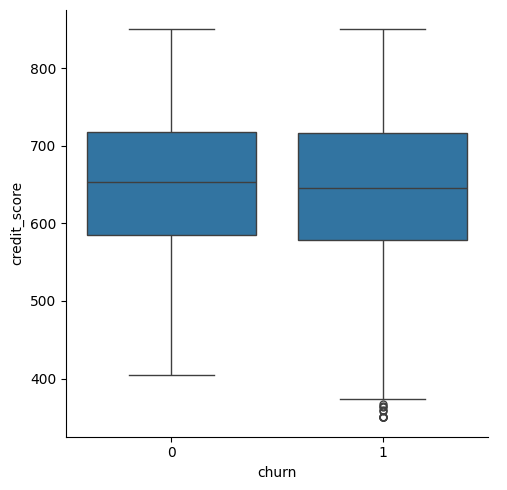

In [64]:
sns.catplot(x = 'churn', y="credit_score", kind="box", data = df)

Olhando para a variável age, podemos ver que as pessoas mais velhas são geralmente mais propensas ao churn.

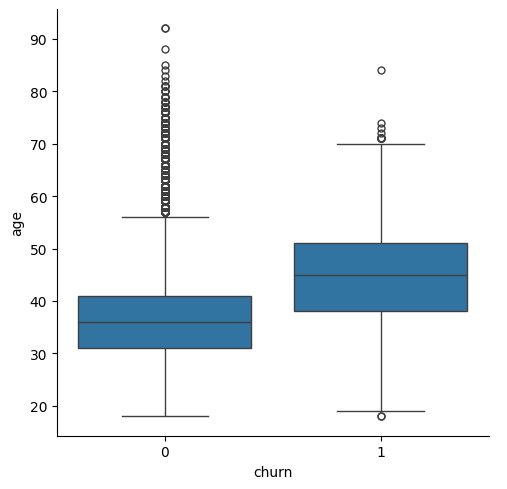

In [65]:
sns.catplot(x = 'churn', y="age", kind="box", data = df)

Quando olhamos para a variável balance, não conseguimos ver muita diferença entre as pontuações e a chance de churn.

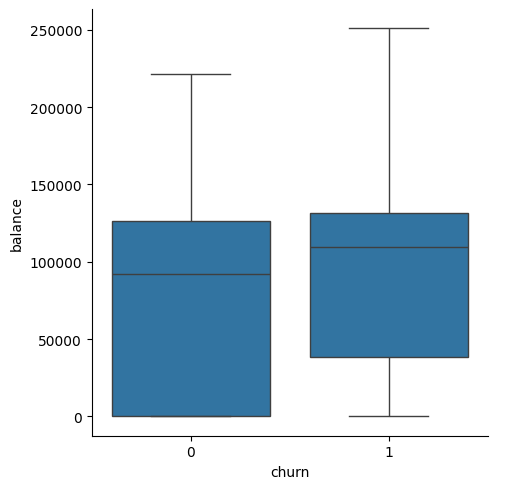

In [66]:
sns.catplot(x = 'churn', y="balance", kind="box", data = df)

Quando olhamos para a variável estimated_salary, não conseguimos ver muita diferença entre as pontuações e a chance de churn.

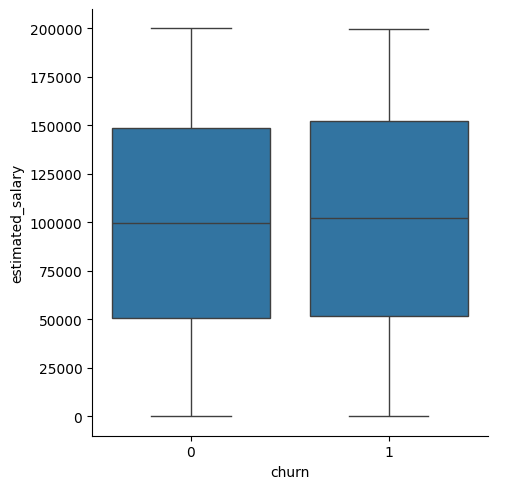

In [67]:
sns.catplot(x = 'churn', y="estimated_salary", kind="box", data = df)

##### One-Hot-Encoder

Quando usar One-Hot Encoding:

Quando a variável não tem um significado ordinal (ex.: sexo, país).

É recomendado para algoritmos baseados em distância (KNN, SVM) ou modelos lineares (Regressão Logística, Regressão Linear), já que esses algoritmos podem interpretar incorretamente as variáveis numéricas de forma ordinal.

In [68]:
df = pd.get_dummies(df, columns=['country'], prefix='country', dtype=int) # Separando os países em 3 colunas para não evitar possíveis erros

In [69]:
df = pd.get_dummies(df, columns=['gender'], prefix='gender', dtype=int)

### Converto a coluna BALANCE para INT

In [70]:
df['balance']=df['balance'].astype(int)

### Converto a coluna ESTIMATED_SALARY para INT

In [71]:
df['estimated_salary']=df['estimated_salary'].astype(int)

### Verifico se as alterações foram feita

In [72]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


### Separação de dados para TREINO e conjunto de TESTE

In [73]:
# Retiro a target do dados de entrada
x = df.drop(columns='churn')

# Coloco nos dados de saida
y = df['churn']

In [74]:
# Confiro se a alteração foi realizada
print(x.shape)
x.head()

(10000, 13)


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,1,1,0


In [75]:
# Confiro se a alteração foi realizada
print(y.shape)
y.head()

(10000,)


0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7, test_size = 0.20, shuffle = True, stratify = y)

In [77]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits = num_particoes, shuffle = True, random_state = 7) # validação cruzada com estratificação

### Criação, avaliação e comparação dos modelos (Modelagem e Inferência)

Esta sessão cria, avalia e compara vários modelos de classificação utilizando validação cruzada e pipelines de escalonamento para selecionar o melhor desempenho.

O StandardScaler() é uma maneira simples e eficaz de colocar todas as variáveis na mesma escala, garantindo que o modelo não favoreça variáveis com maior magnitude

In [78]:
# Lista de modelos
models = []

# Criação dos modelos e adicionando-os na lista de modelos com pipeline (Escalonamento)
models.append(('KNN', Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])))
models.append(('SVM', Pipeline([('scaler', StandardScaler()), ('svm', SVC())])))
models.append(('CART', DecisionTreeClassifier())) # Sem necessidade de escalonamento
models.append(('NB', GaussianNB())) # Sem necessidade de escalonamento

Ensembles são técnicas em aprendizado de máquina que combinam múltiplos modelos preditivos para melhorar a performance geral 
e a robustez das previsões. A ideia principal por trás dos ensembles é que ao combinar previsões de vários modelos, é possível reduzir 
a variância, o viés e muitas vezes melhorar a precisão em relação a um único modelo

Bagging (Bootstrap Aggregating):

O bagging reduz a variância ao treinar múltiplos modelos de forma independente em subconjuntos aleatórios dos dados.
Cada modelo é treinado em uma amostra diferente do conjunto de treinamento (obtida por meio de amostragem com reposição).
As previsões dos modelos são combinadas por meio de votação (para problemas de classificação) ou média (para problemas de regressão).
Um exemplo clássico de bagging é o Random Forest, que utiliza múltiplas árvores de decisão.

Boosting:

O boosting é uma técnica que combina modelos fracos em um modelo forte, onde cada novo modelo tenta corrigir os erros do modelo anterior.
Os modelos são treinados sequencialmente, e cada modelo subsequente dá mais peso às instâncias que foram mal classificadas pelos modelos anteriores.
Exemplos populares de boosting incluem AdaBoost, Gradient Boosting, e XGBoost.

Stacking (Stacked Generalization):

O stacking combina diferentes modelos de aprendizado de máquina, onde as previsões de modelos base (de diferentes tipos) são usadas como entradas para um modelo de nível superior (chamado de meta-modelo).
O objetivo é aproveitar as forças de diferentes algoritmos, combinando suas previsões para melhorar a performance geral.

In [79]:
# Ensembles
base = DecisionTreeClassifier()  # Usado como base no Bagging
num_trees = 100  # Número de estimadores para os ensembles

Random Forest

Tipo de Ensemble: Bagging (Bootstrap Aggregating)

Estratégia: O Random Forest utiliza a técnica de bagging (bootstrap aggregating), que treina vários modelos de árvores de decisão de forma independente. Cada árvore é treinada em um subconjunto aleatório dos dados de treino, com amostragem com reposição.

Treinamento Independente: As árvores são treinadas em paralelo, ou seja, não há dependência entre as árvores.

Combinação dos Modelos: Para classificação, o resultado final é obtido por votação majoritária entre as árvores. Para regressão, o resultado final é a média das previsões de todas as árvores.

Foco: A principal função do Random Forest é reduzir a variância do modelo, diminuindo a chance de overfitting. Como as árvores são treinadas em subconjuntos aleatórios, o modelo é mais robusto a ruído nos dados.

Vantagens: É muito eficaz para grandes conjuntos de dados e possui um bom balanceamento entre viés e variância. Além disso, é fácil de usar e não requer muita parametrização.
__________________________

AdaBoost

Tipo de Ensemble: Boosting

Estratégia: O AdaBoost (Adaptive Boosting) treina modelos de forma sequencial, onde cada novo modelo tenta corrigir os erros cometidos pelos modelos anteriores. O peso das instâncias mal classificadas aumenta para que o próximo modelo foque nesses exemplos mais difíceis.

Treinamento Sequencial: Ao contrário do Random Forest, os modelos (geralmente árvores de decisão rasas, chamadas stumps) são treinados um após o outro, e cada um depende do desempenho do anterior.

Combinação dos Modelos: No final, as previsões dos modelos são combinadas com uma ponderação baseada no desempenho de cada modelo (modelos que tiveram menos erro recebem mais peso).

Foco: O AdaBoost busca reduzir tanto o viés quanto a variância, ao focar nos erros cometidos pelos modelos anteriores.

Vantagens: É eficaz para melhorar a precisão em problemas que um único modelo simples teria dificuldades. Funciona bem para evitar underfitting.
____________________________

XGBClassifier

Tipo de Ensemble: Gradient Boosting

Estratégia: O XGBClassifier é uma implementação otimizada do Gradient Boosting, um método de boosting mais avançado e eficiente. Assim como o AdaBoost, o Gradient Boosting constrói os modelos de forma sequencial, mas de uma maneira diferente: ele ajusta cada novo modelo para minimizar o erro residual (diferença entre a previsão e o valor real) dos modelos anteriores, através da otimização de uma função de perda.

Treinamento Sequencial: Cada árvore é treinada para prever os resíduos dos modelos anteriores, ou seja, as partes que o modelo atual não conseguiu aprender. Assim, o novo modelo corrige os erros de forma progressiva.

Combinação dos Modelos: As previsões finais são combinadas por soma ponderada, assim como no AdaBoost, mas o processo de ajuste de erros é feito com base na função de gradiente.

Foco: O XGBoost (e outras variantes do Gradient Boosting) busca melhorar a performance, reduzindo tanto o viés quanto a variância do modelo. É conhecido por ser um dos métodos mais poderosos para conjuntos de dados tabulares.

Vantagens: Muito eficaz para problemas complexos, com grande controle sobre o overfitting através de hiperparâmetros como learning_rate, max_depth, n_estimators e regularization. É também conhecido por ser muito rápido e eficiente, utilizando técnicas como paralelização.

In [80]:
# Adicionando ensembles a lista
models.append(('RF', RandomForestClassifier(n_estimators=num_trees)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('XGB', XGBClassifier(n_estimators=num_trees)))

# Listas para armazenar os resultados
results = []
names = []

In [81]:
# Avaliação dos modelos usando validação cruzada
for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.8239 (0.0077)
SVM: 0.8516 (0.0086)
CART: 0.7919 (0.0107)
NB: 0.7861 (0.0052)
RF: 0.8592 (0.0112)
AdaBoost: 0.8520 (0.0113)
XGB: 0.8486 (0.0114)


##### Tirar dúvida

Valores antes da aplicação do One-Hot-Encoder nas colunas "Country" e "Gender"

KNN: 0.829625 (0.008963)
SVM: 0.853625 (0.007362)
CART: 0.789250 (0.013430)
NB: 0.783375 (0.008405)
RF: 0.860250 (0.007802)
AdaBoost: 0.856000 (0.008000)
XGB: 0.851500 (0.008548)

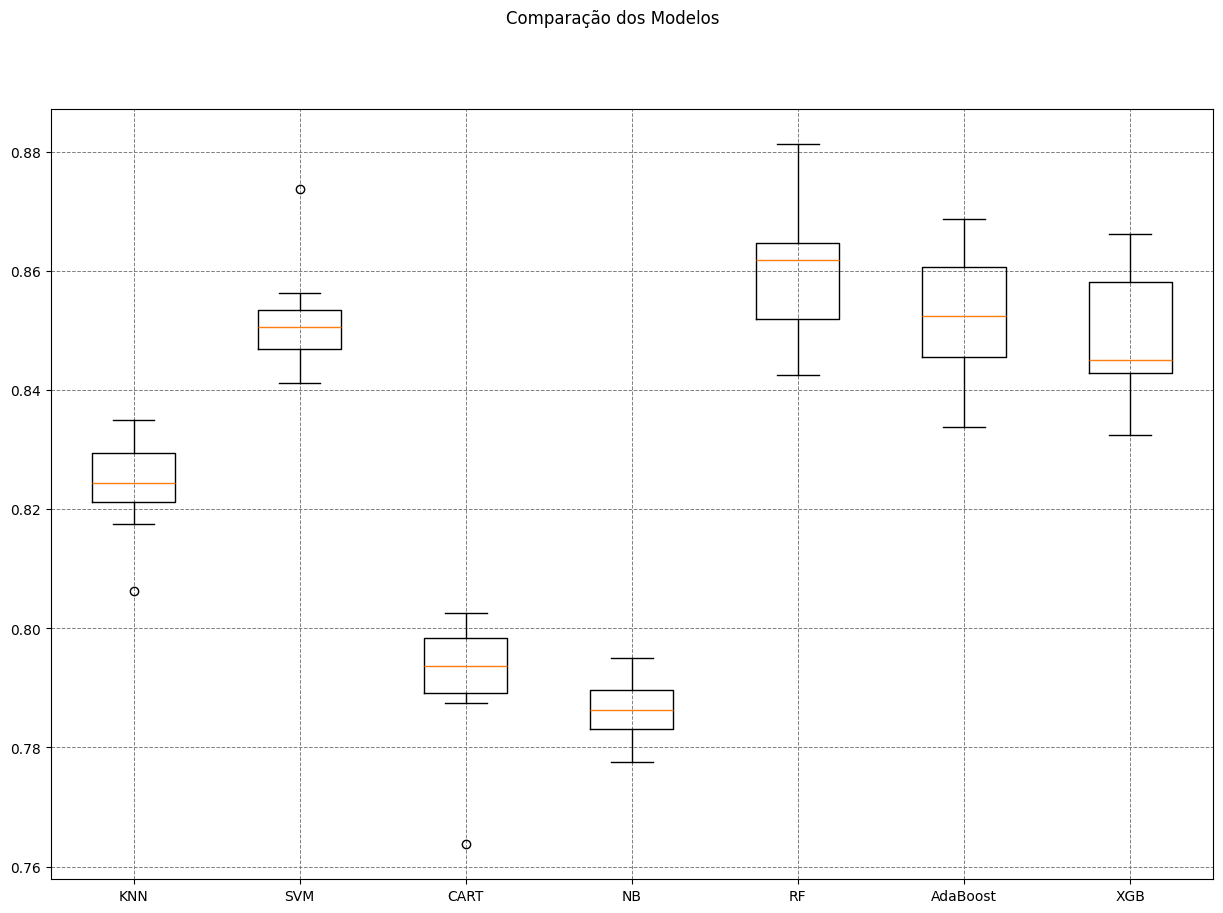

In [82]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111)
plt.grid(True, linestyle='--', linewidth=0.7, color='gray')
plt.boxplot(results)
ax.set_xticklabels(names) 
plt.show()

##### Criação e avaliação de modelos: dados padronizados e normalizados
Esta sessão cria, treina e avalia múltiplos modelos de classificação usando pipelines para comparar o desempenho em diferentes versões do dataset: original, padronizado e normalizado, através de validação cruzada

In [83]:
# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criação dos elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', AdaBoostClassifier())
svm = ('SVM', SVC())
nb = ('NB', GaussianNB())

# Ensembles que serão utilizados

num_trees = 100 # Novamente menciono o numero de estimadores para os ensembles

rf = ('RF', RandomForestClassifier(n_estimators=num_trees))
ada = ('AdaBoost', AdaBoostClassifier(n_estimators=num_trees))
xgb = ('XGB', XGBClassifier(n_estimators=num_trees, learning_rate=0.1))

O StandardScaler padroniza os dados para terem média 0 e desvio padrão 1.

O MinMaxScaler transforma os dados para um intervalo específico (normalmente [0, 1]).

In [84]:
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

In [85]:
# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([nb])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Ensembles no dataset original
pipelines.append(('RF-orig', Pipeline([rf])))
pipelines.append(('AdaBoost-orig', Pipeline([ada])))
pipelines.append(('XGB-orig', Pipeline([xgb])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, nb])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Ensembles no dataset padronizado
pipelines.append(('RF-padr', Pipeline([standard_scaler, rf])))
pipelines.append(('AdaBoost-padr', Pipeline([standard_scaler, ada])))
pipelines.append(('XGB-padr', Pipeline([standard_scaler, xgb])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, nb])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Ensembles no dataset normalizado
pipelines.append(('RF-norm', Pipeline([min_max_scaler, rf])))
pipelines.append(('AdaBoost-norm', Pipeline([min_max_scaler, ada])))
pipelines.append(('XGB-norm', Pipeline([min_max_scaler, xgb])))

In [86]:
# Execução dos pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN-orig: 0.7562 (0.0075)
CART-orig: 0.8524 (0.0106)
NB-orig: 0.7861 (0.0052)
SVM-orig: 0.7962 (0.0000)
RF-orig: 0.8581 (0.0117)
AdaBoost-orig: 0.8520 (0.0113)
XGB-orig: 0.8605 (0.0117)
KNN-padr: 0.8239 (0.0077)
CART-padr: 0.8524 (0.0106)
NB-padr: 0.8127 (0.0087)
SVM-padr: 0.8516 (0.0086)
RF-padr: 0.8581 (0.0116)
AdaBoost-padr: 0.8521 (0.0111)
XGB-padr: 0.8605 (0.0117)
KNN-norm: 0.8137 (0.0100)
CART-norm: 0.8524 (0.0106)
NB-norm: 0.8127 (0.0087)
SVM-norm: 0.8335 (0.0076)
RF-norm: 0.8556 (0.0115)
AdaBoost-norm: 0.8520 (0.0113)
XGB-norm: 0.8605 (0.0117)


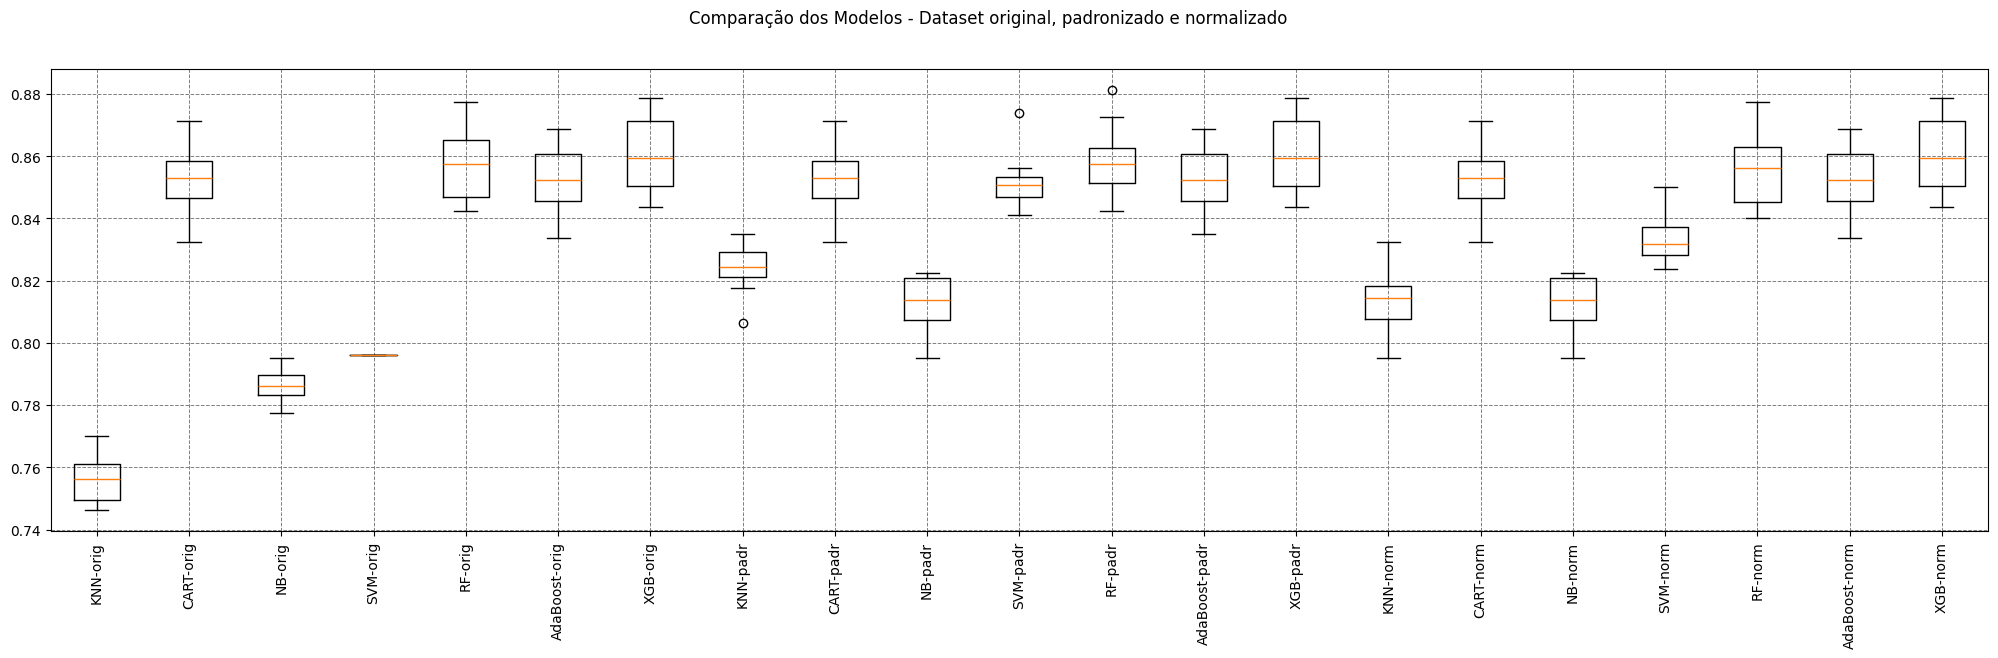

In [87]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.grid(True, linestyle='--', linewidth=0.7, color='gray')
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Modelo de escolha -> XGBClassifier original

##### Otimização dos hiperparâmetros
Esta sessão utiliza GridSearch para realizar uma busca por hiperparâmetros ideais de um modelo Random Forest, treinando e avaliando várias combinações para identificar a melhor configuração de acordo com a acurácia.


Como Funciona o Grid Search?

Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.

Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.

Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [88]:
# TUNING DO XGBClassifier

# Definição da grade de hiperparametros para XGB

param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200], # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # Profundidade máxima
    'max_depth': [3, 5, 7, 9] # Taxa de aprendizado
}

# Definindo o modelo
xgb = XGBClassifier()

grid_search_xgb = GridSearchCV(
                    estimator=xgb, # O modelo a ser otimizado
                    param_grid=param_grid_xgb, # Hiperparâmetros e seus valores
                    cv=5, # Número de dobras para validação cruzada
                    scoring='accuracy', # A métrica para avaliar o desempenho
                    verbose=1, # Mensagens durante a execução
                    n_jobs=-1)# Usar todos os núcleos disponíveis

# Treinamento do modelo com a otimização dos hiperparametros
grid_search_xgb.fit(x_train, y_train)

# Melhores parametros
print("Melhor parâmetro para XGBClassifier:", grid_search_xgb.best_params_) # O atributo best_params_ retorna o melhor parametro


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Melhor parâmetro para XGBClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Verificando a acurácia, após a utilização do Grid Search, com os melhores parametros

In [89]:
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(x_test)
print("Acurácia do modelo otimizado:", accuracy_score(y_test, y_pred))

Acurácia do modelo otimizado: 0.8715


Finalização do Modelo

Foi utilizado o modelo -> XGBClassifier

Melhor parâmetro para XGBClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Nesta seção agora aplicaremos a padronização nos dados, treinaremos o modelos com os dados normalizados e avaliaremos a performance no conjunto de teste, verificando a acuracia e a importancia das features para o modelo.

In [90]:
scaler = StandardScaler().fit(x_train)  # Ajuste do scale com o conjunto de treino
rescaledX_train = scaler.transform(x_train)  # Aplicando a padronização no conjunto de treino

# Definindo o XGBClassifier com os melhores parametros

model = XGBClassifier(
    n_estimators=200,  # Número de árvores
    max_depth=3,  # Profundidade máxima
    learning_rate=0.1, # Taxa de aprendizado
    random_state=7  # SEED
)

# Treinando o modelo com os dados normalizados
model.fit(rescaledX_train, y_train)  # O modelo é treinado com o conjunto de treino normalizado

# Estimativa da acurácia no conjunto de teste
rescaledX_test = scaler.transform(x_test)  # O conjunto de teste é padronizado da mesma forma que o treino
prediction = model.predict(rescaledX_test)  # O modelo faz previsões no conjunto de teste

# Exibindo a acurácia do modelo no conjunto de teste
print("Acurácia no conjunto de teste:", accuracy_score(y_test, prediction))  # Exibe a acurácia no conjunto de teste

# Exibe a importância das features
importances = model.feature_importances_  # Importancias das features de acordo com o XGB
indices = np.argsort(importances)[::-1]  # Ordena as features pela importancia

Acurácia no conjunto de teste: 0.8715


In [91]:
from sklearn.metrics import classification_report

# Define um pipeline com escalonamento e XGBCLassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Etapa de escalonamento
    ('xgb', XGBClassifier(
    n_estimators=200,  # Número de árvores
    max_depth=3,  # Profundidade máxima
    learning_rate=0.1, # Taxa de aprendizado
    random_state=7  # SEED
    ))  # Modelo XGB com os melhores hiperparâmetros
])

# Treinamento do pipeline no conjunto de treino
pipeline.fit(x_train, y_train)

# Predição no conjunto de teste usando o pipeline
prediction = pipeline.predict(x_test)

# Estimativa da acurácia no conjunto de teste
print("Acurácia no conjunto de teste:", accuracy_score(y_test, prediction))

# Gera o relatório de classificação
report = classification_report(y_test, prediction, target_names=['neutral or dissatisfied', 'satisfied'])

# Exibir o relatório de classificação
print("Relatório de Classificação:")
print(report)

Acurácia no conjunto de teste: 0.8715
Relatório de Classificação:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.89      0.96      0.92      1593
              satisfied       0.78      0.52      0.62       407

               accuracy                           0.87      2000
              macro avg       0.83      0.74      0.77      2000
           weighted avg       0.86      0.87      0.86      2000



In [92]:
# Salvando o modelo

import pickle

model_bankChurn = 'xgb_churn_classifier.pkl'
with open("../models/" + model_bankChurn, 'wb') as file:
    pickle.dump(pipeline.named_steps['xgb'], file) # Salvando apenas o modelo escolhido XGBClassifier

scaler_bankChurn = 'std_bankChurn.pkl'
with open("../scalers/" + scaler_bankChurn, "wb") as file:
    pickle.dump(pipeline.named_steps['scaler'], file) # Salvando apenas o scaler

pipeline_bankChurn = "xgb_bankChurn.pkl"
with open("../pipelines/" + pipeline_bankChurn, "wb") as file:
    pickle.dump(pipeline, file) # Salvando o pipeline completo (com scaler e modelo)

# Salvando X_test e y_test
x_test_df = pd.DataFrame(x_test, columns=df.drop(columns=['churn']).columns)  # salvando todas as colunas menos a coluna target "churn"
y_test_df = pd.DataFrame(y_test, columns=['churn'])  # nome da coluna alvo
x_test_df.to_csv("../data/data_train_test/x_test_dataset_bankChurn.csv", index=False)
y_test_df.to_csv("../data/data_train_test/y_test_dataset_bankChurn.csv", index=False)

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [93]:
# Preparação do modelo com TODO o dataset

# Ajuste do scaler com TODO o dataset
scaler = StandardScaler().fit(x)  # Ajuste do scaler com o dataset completo
rescaledX = scaler.transform(x)  # Aplicação da padronização com TODO o dataset

# Treinamento do modelo XGB com todo o dataset e com os melhores hiperparâmetros encontrados
model = XGBClassifier(
    n_estimators=200,  # Número de árvores
    max_depth=3,  # Profundidade máxima
    learning_rate=0.1, # Taxa de aprendizado
    random_state=7  # SEED
)

# Ajuste do modelo com o dataset padronizado
model.fit(rescaledX, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [95]:
# Novos dados - não sabemos a classe!

data = {
    'credit_score': [350, 486, 241], # pontuação de crédito
    'age' : [30, 26, 59], # idade
    'tenure' : [8, 2, 9], # posses
    'balance' : [90000, 5874, 10000], # saldo bancário
    'products_number' : [3, 8, 3], # número de produtos do banco
    'credit_card' : [0, 0, 1], # cartão de crédito
    'active_member' : [1, 1, 0], # membro ativo
    'estimated_salary' : [38000, 10000, 90000], # salário estimado
    'country_France' : [0, 1, 0], # país França
    'country_Germany' : [1, 0, 0], # país Alemanha
    'country_Spain' : [0, 1, 0], # país Espanha
    'gender_Female' : [1, 1, 1], # sexo Feminino
    'gender_Male' : [0, 0, 0] # sexo Masculino
}

atributos = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 
             'active_member', 'estimated_salary', 'country_France',
             'country_Germany', 'country_Spain', 'gender_Female', 'gender_Male']

entrada = pd.DataFrame(data, columns=atributos)

# Converte para np.array e transforma para float
x_entrada = entrada.values.astype(float)

# Padronização nos dados de entrada usando o scaler utilizado no pipeline
rescaledEntradaX = pipeline.named_steps['scaler'].transform(x_entrada)  # Reutiliza o scaler do pipeline

print("Dados de entrada escalonados:\n", rescaledEntradaX)

# Previsão de classes dos dados de entrada usando o modelo XGBClassifier treinado no pipeline
predictions = pipeline.predict(rescaledEntradaX)
print("Previsões para os novos dados:", predictions)

Dados de entrada escalonados:
 [[-3.10248562 -0.85530141  1.03137841  0.21489404  2.5255029  -1.54776799
   0.96825365 -1.07767533 -1.00300451  1.74601919 -0.57965968  1.09886556
  -1.09886556]
 [-1.69359514 -1.23686624 -1.04000919 -1.12906141 11.10762131 -1.54776799
   0.96825365 -1.56713633  0.99700449 -0.57273139  1.72515018  1.09886556
  -1.09886556]
 [-4.23166991  1.91104359  1.37660968 -1.06314647  2.5255029   0.64609167
  -1.03278722 -0.16867632 -1.00300451 -0.57273139 -0.57965968  1.09886556
  -1.09886556]]
Previsões para os novos dados: [0 1 0]


##### Análise
O modelo XGBClassifier apresenta uma boa acurácia global (87.15%), com um excelente desempenho na classe majoritária ("neutral or dissatisfied"). No entanto, a performance para a classe minoritária ("satisfied") é notavelmente mais baixa, especialmente em termos de recall (52%), o que indica que o modelo está deixando de identificar corretamente uma boa quantidade de instâncias dessa classe.

Isso pode ser resultado de um desequilíbrio de classes no conjunto de dados, onde a classe "neutral or dissatisfied" tem mais exemplos (1593) do que a classe "satisfied" (407). Como consequência, o modelo pode estar superajustado à classe majoritária, favorecendo previsões nessa classe em detrimento da classe minoritária.

##### Possíveis Melhorias
Técnicas de balanceamento de classes: Como RandomOverSampler ou SMOTE poderiam ser usadas para melhorar o reconhecimento da classe minoritária ("satisfied").
Ajustes de hiperparâmetros: Poderia-se ajustar os hiperparâmetros do XGBClassifier para melhorar o desempenho da classe minoritária.
Penalização de classes desbalanceadas: Aplicar pesos diferentes para as classes, de forma que a classe "satisfied" tenha um peso maior na função de perda do modelo.

##### Conclusão
O modelo é eficaz para prever a classe majoritária, mas precisa de melhorias para lidar com a classe minoritária. Técnicas de balanceamento e ajustes finos podem aumentar a capacidade do modelo de identificar corretamente instâncias de "satisfied".

Achei uma matéria bem importante e bem explicada. Fiquei com algumas dúvidas sobre como posso equilibrar a classe minoritária colocando dados aleatórios, de modo que não haja um viés.

Ja tinha estudado Machine Learning na Alura, mas não levei para frente os aprendizados.
Não sei se foi uma boa utilizar a função get_dummies nas colunas "Country" e "Gender", talvez se eu só equilibrasse as classes minoritarias, teria me saido melhor.
Por fim, achei bem esclarecedor, também a integração de todo o sistema, acho que essa parte é a mais complexa de se encontrar na internet hoje em dia.